# 🔍 Análisis Exploratorio de Datos (EDA)
## Fraud Detector para Transacciones Bancarias

Este notebook realiza un análisis exploratorio completo del dataset de detección de fraude en tarjetas de crédito de Kaggle.

**Objetivos:**
- Explorar la estructura y características del dataset
- Analizar la distribución de clases (fraude vs no fraude)
- Identificar patrones y correlaciones en los datos
- Visualizar las características principales
- Detectar valores atípicos y patrones temporales

## 1. Importación de Librerías

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Estadísticas
from scipy import stats
from scipy.stats import chi2_contingency

# Configuración
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración de Plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

print("📚 Librerías importadas exitosamente!")

📚 Librerías importadas exitosamente!


## 2. Carga y Exploración Inicial de Datos

In [2]:
# Cargar el dataset
try:
    df = pd.read_csv('../data/raw/creditcard.csv')
    print("✅ Dataset cargado exitosamente!")
    print(f"📊 Dimensiones del dataset: {df.shape}")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo 'creditcard.csv' en '../data/raw/'")
    print("📥 Por favor, descarga el dataset desde Kaggle y colócalo en la carpeta 'data/raw/'")
    print("🔗 Link: https://www.kaggle.com/mlg-ulb/creditcardfraud")

✅ Dataset cargado exitosamente!
📊 Dimensiones del dataset: (284807, 31)


In [3]:
# Información general del dataset
print("📋 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📊 Primeras 5 filas:")
display(df.head())

📋 INFORMACIÓN GENERAL DEL DATASET
Número de filas: 284,807
Número de columnas: 31
Tamaño en memoria: 67.36 MB

📊 Primeras 5 filas:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Información detallada de las columnas
print("🔍 INFORMACIÓN DETALLADA DE LAS COLUMNAS")
print("=" * 50)
df.info()

print("\n📈 Estadísticas descriptivas:")
display(df.describe().round(1).T)

🔍 INFORMACIÓN DETALLADA DE LAS COLUMNAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.9,47488.1,0.0,54201.5,84692.0,139320.5,172792.0
V1,284807.0,0.0,2.0,-56.4,-0.9,0.0,1.3,2.5
V2,284807.0,0.0,1.7,-72.7,-0.6,0.1,0.8,22.1
V3,284807.0,-0.0,1.5,-48.3,-0.9,0.2,1.0,9.4
V4,284807.0,0.0,1.4,-5.7,-0.8,-0.0,0.7,16.9
V5,284807.0,0.0,1.4,-113.7,-0.7,-0.1,0.6,34.8
V6,284807.0,0.0,1.3,-26.2,-0.8,-0.3,0.4,73.3
V7,284807.0,-0.0,1.2,-43.6,-0.6,0.0,0.6,120.6
V8,284807.0,0.0,1.2,-73.2,-0.2,0.0,0.3,20.0
V9,284807.0,-0.0,1.1,-13.4,-0.6,-0.1,0.6,15.6


In [11]:
# Verificar valores faltantes
print("❓ VALORES FALTANTES")
print("=" * 30)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    print("⚠️ Valores faltantes encontrados:")
    print(missing_values[missing_values > 0])

# Verificar duplicados
duplicated_rows = df.duplicated().sum()
print(f"\n🔄 Filas duplicadas: {duplicated_rows}")
if duplicated_rows > 0:
    print(f"📊 Porcentaje de duplicados: {duplicated_rows/len(df)*100:.2f}%")

❓ VALORES FALTANTES
✅ No hay valores faltantes en el dataset

🔄 Filas duplicadas: 1081
📊 Porcentaje de duplicados: 0.38%


## 3. Análisis de la Variable Objetivo (Clase)

In [12]:
# Análisis de la distribución de clases
print("🎯 ANÁLISIS DE LA VARIABLE OBJETIVO")
print("=" * 40)

class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("📊 Distribución de clases:")
for class_label, count in class_counts.items():
    class_name = "No Fraude" if class_label == 0 else "Fraude"
    percentage = class_percentages[class_label]
    print(f"  {class_name} (Clase {class_label}): {count:,} ({percentage:.3f}%)")

# Ratio de desbalance
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n⚖️ Ratio de desbalance: {imbalance_ratio:.1f}:1")
print(f"   Por cada transacción fraudulenta hay {imbalance_ratio:.0f} transacciones legítimas")

🎯 ANÁLISIS DE LA VARIABLE OBJETIVO
📊 Distribución de clases:
  No Fraude (Clase 0): 284,315 (99.827%)
  Fraude (Clase 1): 492 (0.173%)

⚖️ Ratio de desbalance: 577.9:1
   Por cada transacción fraudulenta hay 578 transacciones legítimas


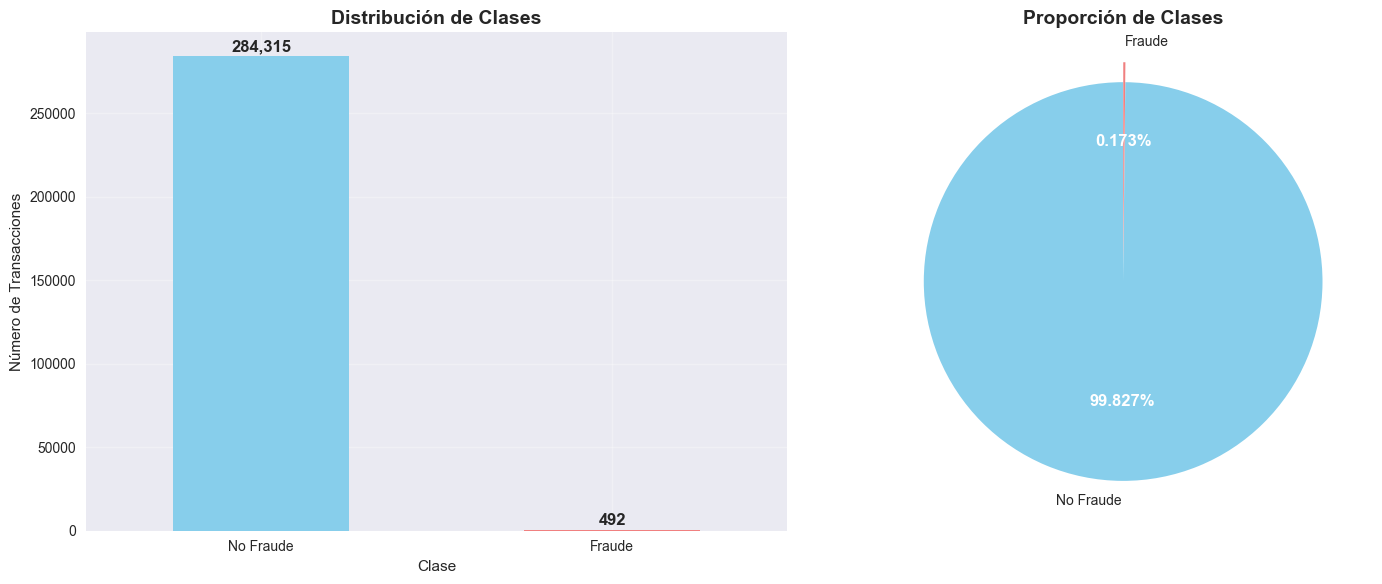


💡 Observación: El dataset está altamente desbalanceado, lo que requerirá técnicas especiales de balanceo.


In [13]:
# Visualización de la distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
class_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Distribución de Clases', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Número de Transacciones')
axes[0].set_xticklabels(['No Fraude', 'Fraude'], rotation=0)
axes[0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
colors = ['skyblue', 'lightcoral']
wedges, texts, autotexts = axes[1].pie(class_counts.values, 
                                       labels=['No Fraude', 'Fraude'],
                                       autopct='%1.3f%%',
                                       colors=colors,
                                       startangle=90,
                                       explode=(0, 0.1))
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')

# Mejorar el texto del gráfico de pastel
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

print("\n💡 Observación: El dataset está altamente desbalanceado, lo que requerirá técnicas especiales de balanceo.")

## 4. Análisis de la Variable Temporal

In [14]:
# Análisis de la variable Time
print("⏰ ANÁLISIS DE LA VARIABLE TEMPORAL")
print("=" * 40)

time_stats = df['Time'].describe()
print("📊 Estadísticas de Time:")
print(time_stats)

# Convertir tiempo a horas para mejor interpretación
df['Time_hours'] = df['Time'] / 3600
print(f"\n📅 Rango temporal: {df['Time_hours'].min():.1f} - {df['Time_hours'].max():.1f} horas")
print(f"📅 Duración total: {df['Time_hours'].max():.1f} horas ({df['Time_hours'].max()/24:.1f} días)")

⏰ ANÁLISIS DE LA VARIABLE TEMPORAL
📊 Estadísticas de Time:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

📅 Rango temporal: 0.0 - 48.0 horas
📅 Duración total: 48.0 horas (2.0 días)


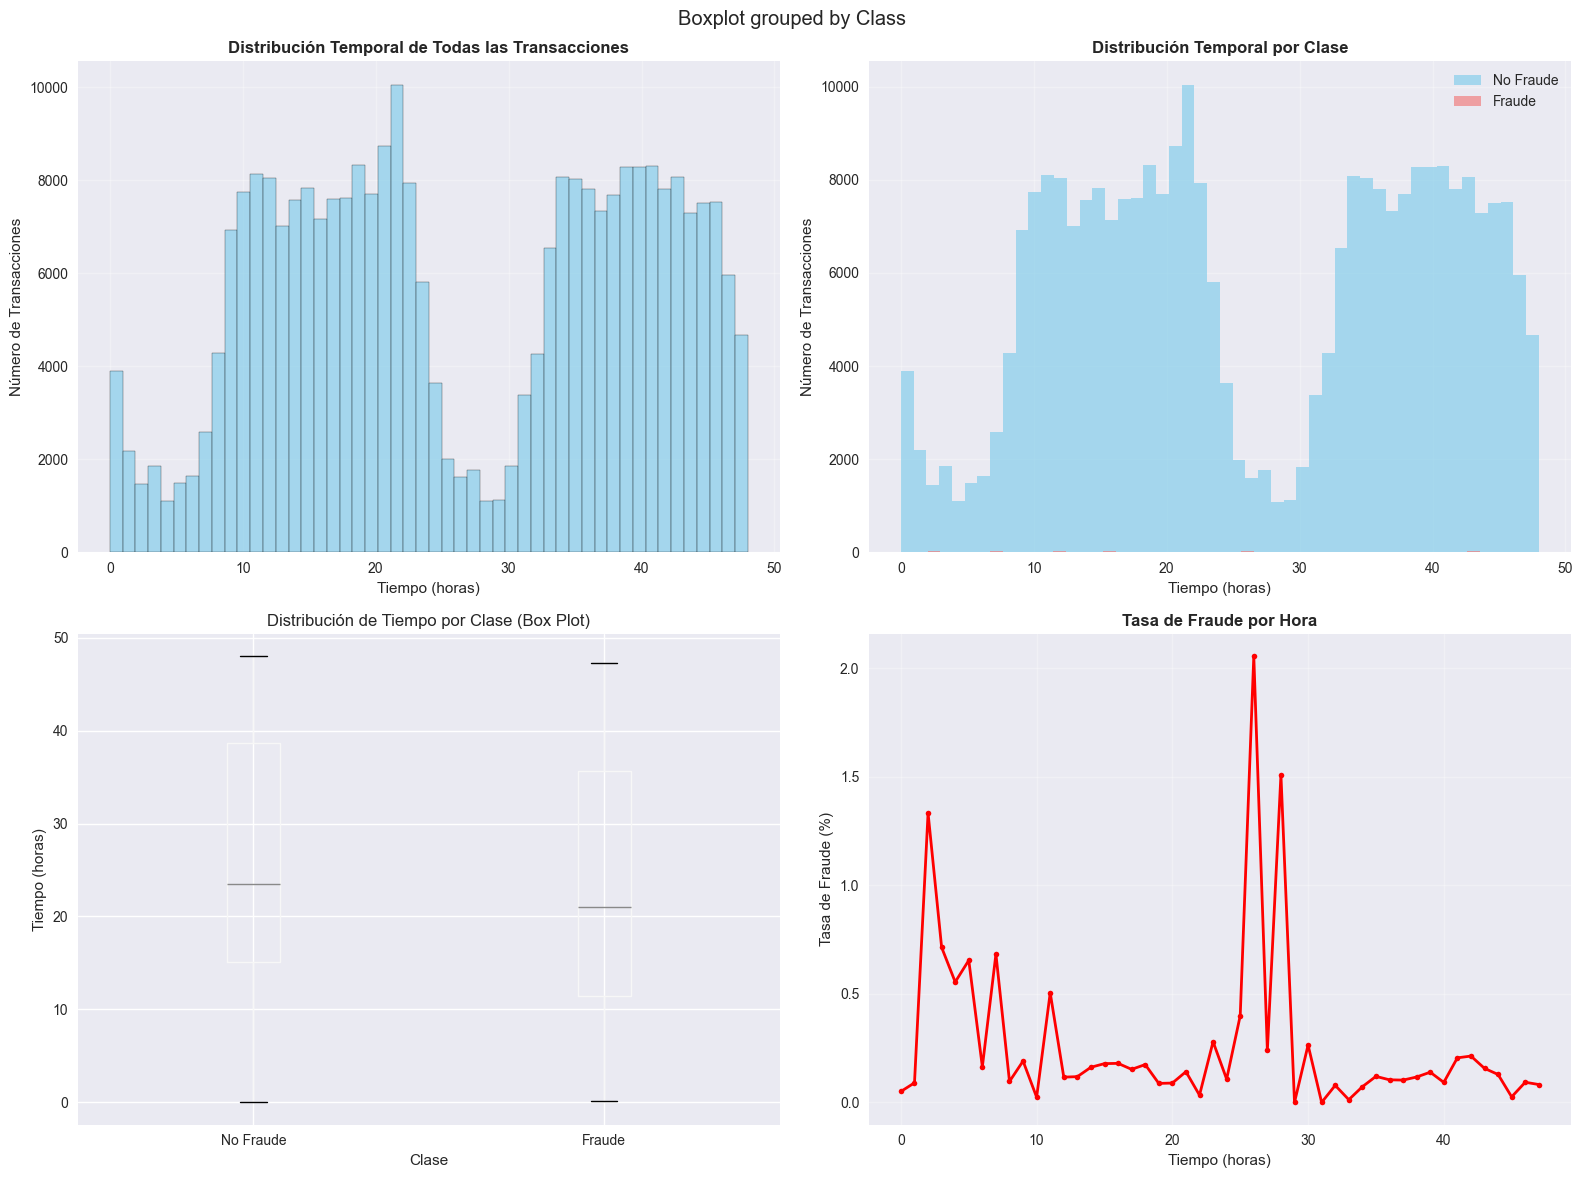

In [15]:
# Distribución temporal de transacciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de tiempo (todas las transacciones)
axes[0,0].hist(df['Time_hours'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución Temporal de Todas las Transacciones', fontweight='bold')
axes[0,0].set_xlabel('Tiempo (horas)')
axes[0,0].set_ylabel('Número de Transacciones')
axes[0,0].grid(True, alpha=0.3)

# Distribución temporal por clase
for class_label in [0, 1]:
    class_name = "No Fraude" if class_label == 0 else "Fraude"
    color = 'skyblue' if class_label == 0 else 'lightcoral'
    data = df[df['Class'] == class_label]['Time_hours']
    axes[0,1].hist(data, bins=50, alpha=0.7, label=class_name, color=color)

axes[0,1].set_title('Distribución Temporal por Clase', fontweight='bold')
axes[0,1].set_xlabel('Tiempo (horas)')
axes[0,1].set_ylabel('Número de Transacciones')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Box plot de tiempo por clase
df.boxplot(column='Time_hours', by='Class', ax=axes[1,0])
axes[1,0].set_title('Distribución de Tiempo por Clase (Box Plot)')
axes[1,0].set_xlabel('Clase')
axes[1,0].set_ylabel('Tiempo (horas)')
axes[1,0].set_xticklabels(['No Fraude', 'Fraude'])

# Densidad de transacciones fraudulentas por hora
fraud_by_hour = df[df['Class'] == 1].groupby(df['Time_hours'].astype(int))['Class'].count()
total_by_hour = df.groupby(df['Time_hours'].astype(int))['Class'].count()
fraud_rate_by_hour = (fraud_by_hour / total_by_hour * 100).fillna(0)

axes[1,1].plot(fraud_rate_by_hour.index, fraud_rate_by_hour.values, 
               marker='o', color='red', linewidth=2, markersize=4)
axes[1,1].set_title('Tasa de Fraude por Hora', fontweight='bold')
axes[1,1].set_xlabel('Tiempo (horas)')
axes[1,1].set_ylabel('Tasa de Fraude (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análisis de la Variable Amount

In [16]:
# Análisis de la variable Amount
print("💰 ANÁLISIS DE LA VARIABLE AMOUNT")
print("=" * 40)

amount_stats = df['Amount'].describe()
print("📊 Estadísticas de Amount:")
print(amount_stats)

# Estadísticas por clase
print("\n📊 Estadísticas de Amount por Clase:")
for class_label in [0, 1]:
    class_name = "No Fraude" if class_label == 0 else "Fraude"
    class_data = df[df['Class'] == class_label]['Amount']
    print(f"\n{class_name}:")
    print(f"  Media: ${class_data.mean():.2f}")
    print(f"  Mediana: ${class_data.median():.2f}")
    print(f"  Desviación estándar: ${class_data.std():.2f}")
    print(f"  Mínimo: ${class_data.min():.2f}")
    print(f"  Máximo: ${class_data.max():.2f}")

💰 ANÁLISIS DE LA VARIABLE AMOUNT
📊 Estadísticas de Amount:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

📊 Estadísticas de Amount por Clase:

No Fraude:
  Media: $88.29
  Mediana: $22.00
  Desviación estándar: $250.11
  Mínimo: $0.00
  Máximo: $25691.16

Fraude:
  Media: $122.21
  Mediana: $9.25
  Desviación estándar: $256.68
  Mínimo: $0.00
  Máximo: $2125.87


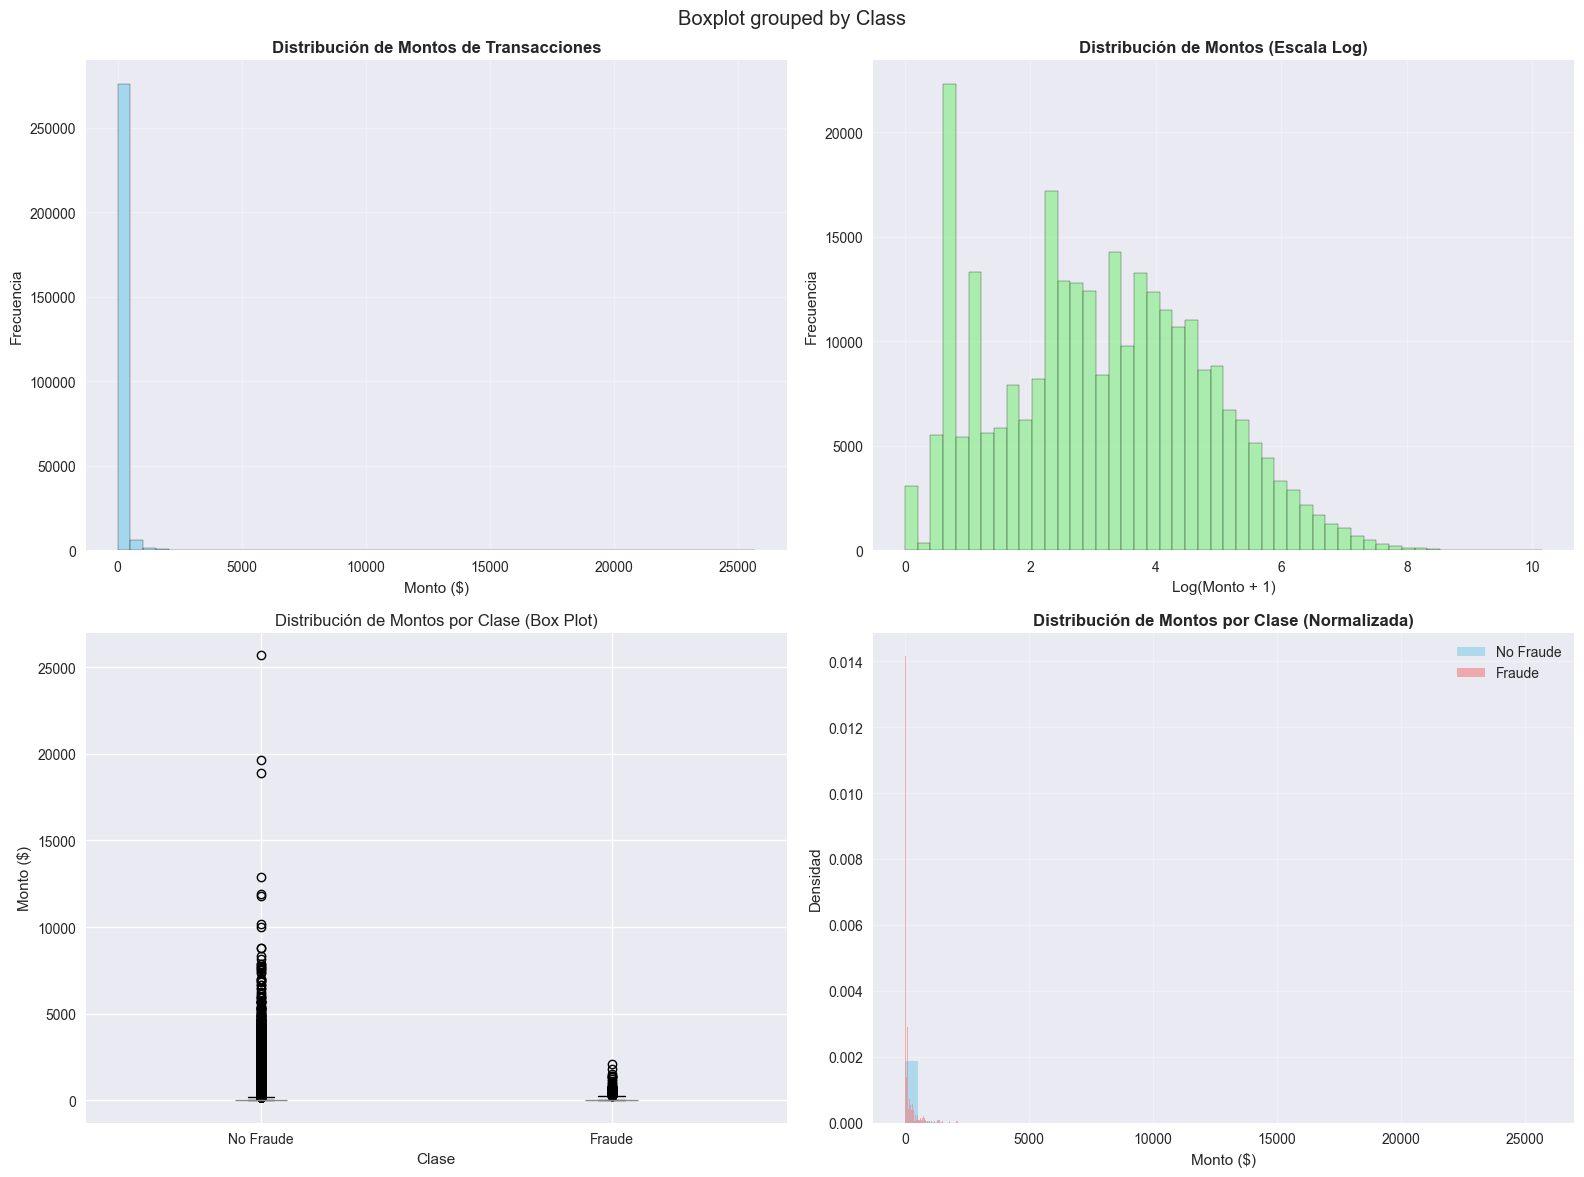

In [17]:
# Visualización de la variable Amount
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de Amount (todas las transacciones)
axes[0,0].hist(df['Amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución de Montos de Transacciones', fontweight='bold')
axes[0,0].set_xlabel('Monto ($)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# Histograma de Amount en escala log
# Agregar una pequeña constante para evitar log(0)
amount_log = np.log1p(df['Amount'])  # log1p = log(1+x)
axes[0,1].hist(amount_log, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución de Montos (Escala Log)', fontweight='bold')
axes[0,1].set_xlabel('Log(Monto + 1)')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# Box plot de Amount por clase
df.boxplot(column='Amount', by='Class', ax=axes[1,0])
axes[1,0].set_title('Distribución de Montos por Clase (Box Plot)')
axes[1,0].set_xlabel('Clase')
axes[1,0].set_ylabel('Monto ($)')
axes[1,0].set_xticklabels(['No Fraude', 'Fraude'])

# Histograma comparativo por clase
for class_label in [0, 1]:
    class_name = "No Fraude" if class_label == 0 else "Fraude"
    color = 'skyblue' if class_label == 0 else 'lightcoral'
    data = df[df['Class'] == class_label]['Amount']
    axes[1,1].hist(data, bins=50, alpha=0.6, label=class_name, color=color, density=True)

axes[1,1].set_title('Distribución de Montos por Clase (Normalizada)', fontweight='bold')
axes[1,1].set_xlabel('Monto ($)')
axes[1,1].set_ylabel('Densidad')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# Análisis de transacciones de alto valor
print("💎 ANÁLISIS DE TRANSACCIONES DE ALTO VALOR")
print("=" * 45)

# Definir umbrales
percentiles = [90, 95, 99]
thresholds = [df['Amount'].quantile(p/100) for p in percentiles]

for i, (percentile, threshold) in enumerate(zip(percentiles, thresholds)):
    high_value_mask = df['Amount'] >= threshold
    high_value_total = high_value_mask.sum()
    high_value_fraud = df[high_value_mask]['Class'].sum()
    fraud_rate = (high_value_fraud / high_value_total * 100) if high_value_total > 0 else 0
    
    print(f"\n📊 Transacciones >= Percentil {percentile} (${threshold:.2f}):")
    print(f"   Total: {high_value_total:,}")
    print(f"   Fraudulentas: {high_value_fraud}")
    print(f"   Tasa de fraude: {fraud_rate:.2f}%")

# Análisis de transacciones de monto cero
zero_amount = (df['Amount'] == 0).sum()
zero_amount_fraud = df[df['Amount'] == 0]['Class'].sum()
print(f"\n💰 Transacciones de monto $0:")
print(f"   Total: {zero_amount:,}")
print(f"   Fraudulentas: {zero_amount_fraud}")
if zero_amount > 0:
    print(f"   Tasa de fraude: {zero_amount_fraud/zero_amount*100:.2f}%")

💎 ANÁLISIS DE TRANSACCIONES DE ALTO VALOR

📊 Transacciones >= Percentil 90 ($203.00):
   Total: 28,483
   Fraudulentas: 85
   Tasa de fraude: 0.30%

📊 Transacciones >= Percentil 95 ($365.00):
   Total: 14,242
   Fraudulentas: 43
   Tasa de fraude: 0.30%

📊 Transacciones >= Percentil 99 ($1017.97):
   Total: 2,849
   Fraudulentas: 9
   Tasa de fraude: 0.32%

💰 Transacciones de monto $0:
   Total: 1,825
   Fraudulentas: 27
   Tasa de fraude: 1.48%


## 6. Análisis de las Variables PCA (V1-V28)

In [20]:
# Análisis de las variables PCA
print("🔍 ANÁLISIS DE LAS VARIABLES PCA (V1-V28)")
print("=" * 45)

# Identificar columnas PCA
pca_columns = [col for col in df.columns if col.startswith('V')]
print(f"📊 Número de variables PCA: {len(pca_columns)}")
print(f"📋 Variables PCA: {', '.join(pca_columns)}")

# Estadísticas descriptivas de variables PCA
pca_stats = df[pca_columns].describe().round(1).T
print("\n📈 Estadísticas descriptivas de variables PCA:")
display(pca_stats)

🔍 ANÁLISIS DE LAS VARIABLES PCA (V1-V28)
📊 Número de variables PCA: 28
📋 Variables PCA: V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28

📈 Estadísticas descriptivas de variables PCA:


,count,mean,std,min,25%,50%,75%,max
V1,284807.0,0.0,2.0,-56.4,-0.9,0.0,1.3,2.5
V2,284807.0,0.0,1.7,-72.7,-0.6,0.1,0.8,22.1
V3,284807.0,-0.0,1.5,-48.3,-0.9,0.2,1.0,9.4
V4,284807.0,0.0,1.4,-5.7,-0.8,-0.0,0.7,16.9
V5,284807.0,0.0,1.4,-113.7,-0.7,-0.1,0.6,34.8
V6,284807.0,0.0,1.3,-26.2,-0.8,-0.3,0.4,73.3
V7,284807.0,-0.0,1.2,-43.6,-0.6,0.0,0.6,120.6
V8,284807.0,0.0,1.2,-73.2,-0.2,0.0,0.3,20.0
V9,284807.0,-0.0,1.1,-13.4,-0.6,-0.1,0.6,15.6
V10,284807.0,0.0,1.1,-24.6,-0.5,-0.1,0.5,23.7


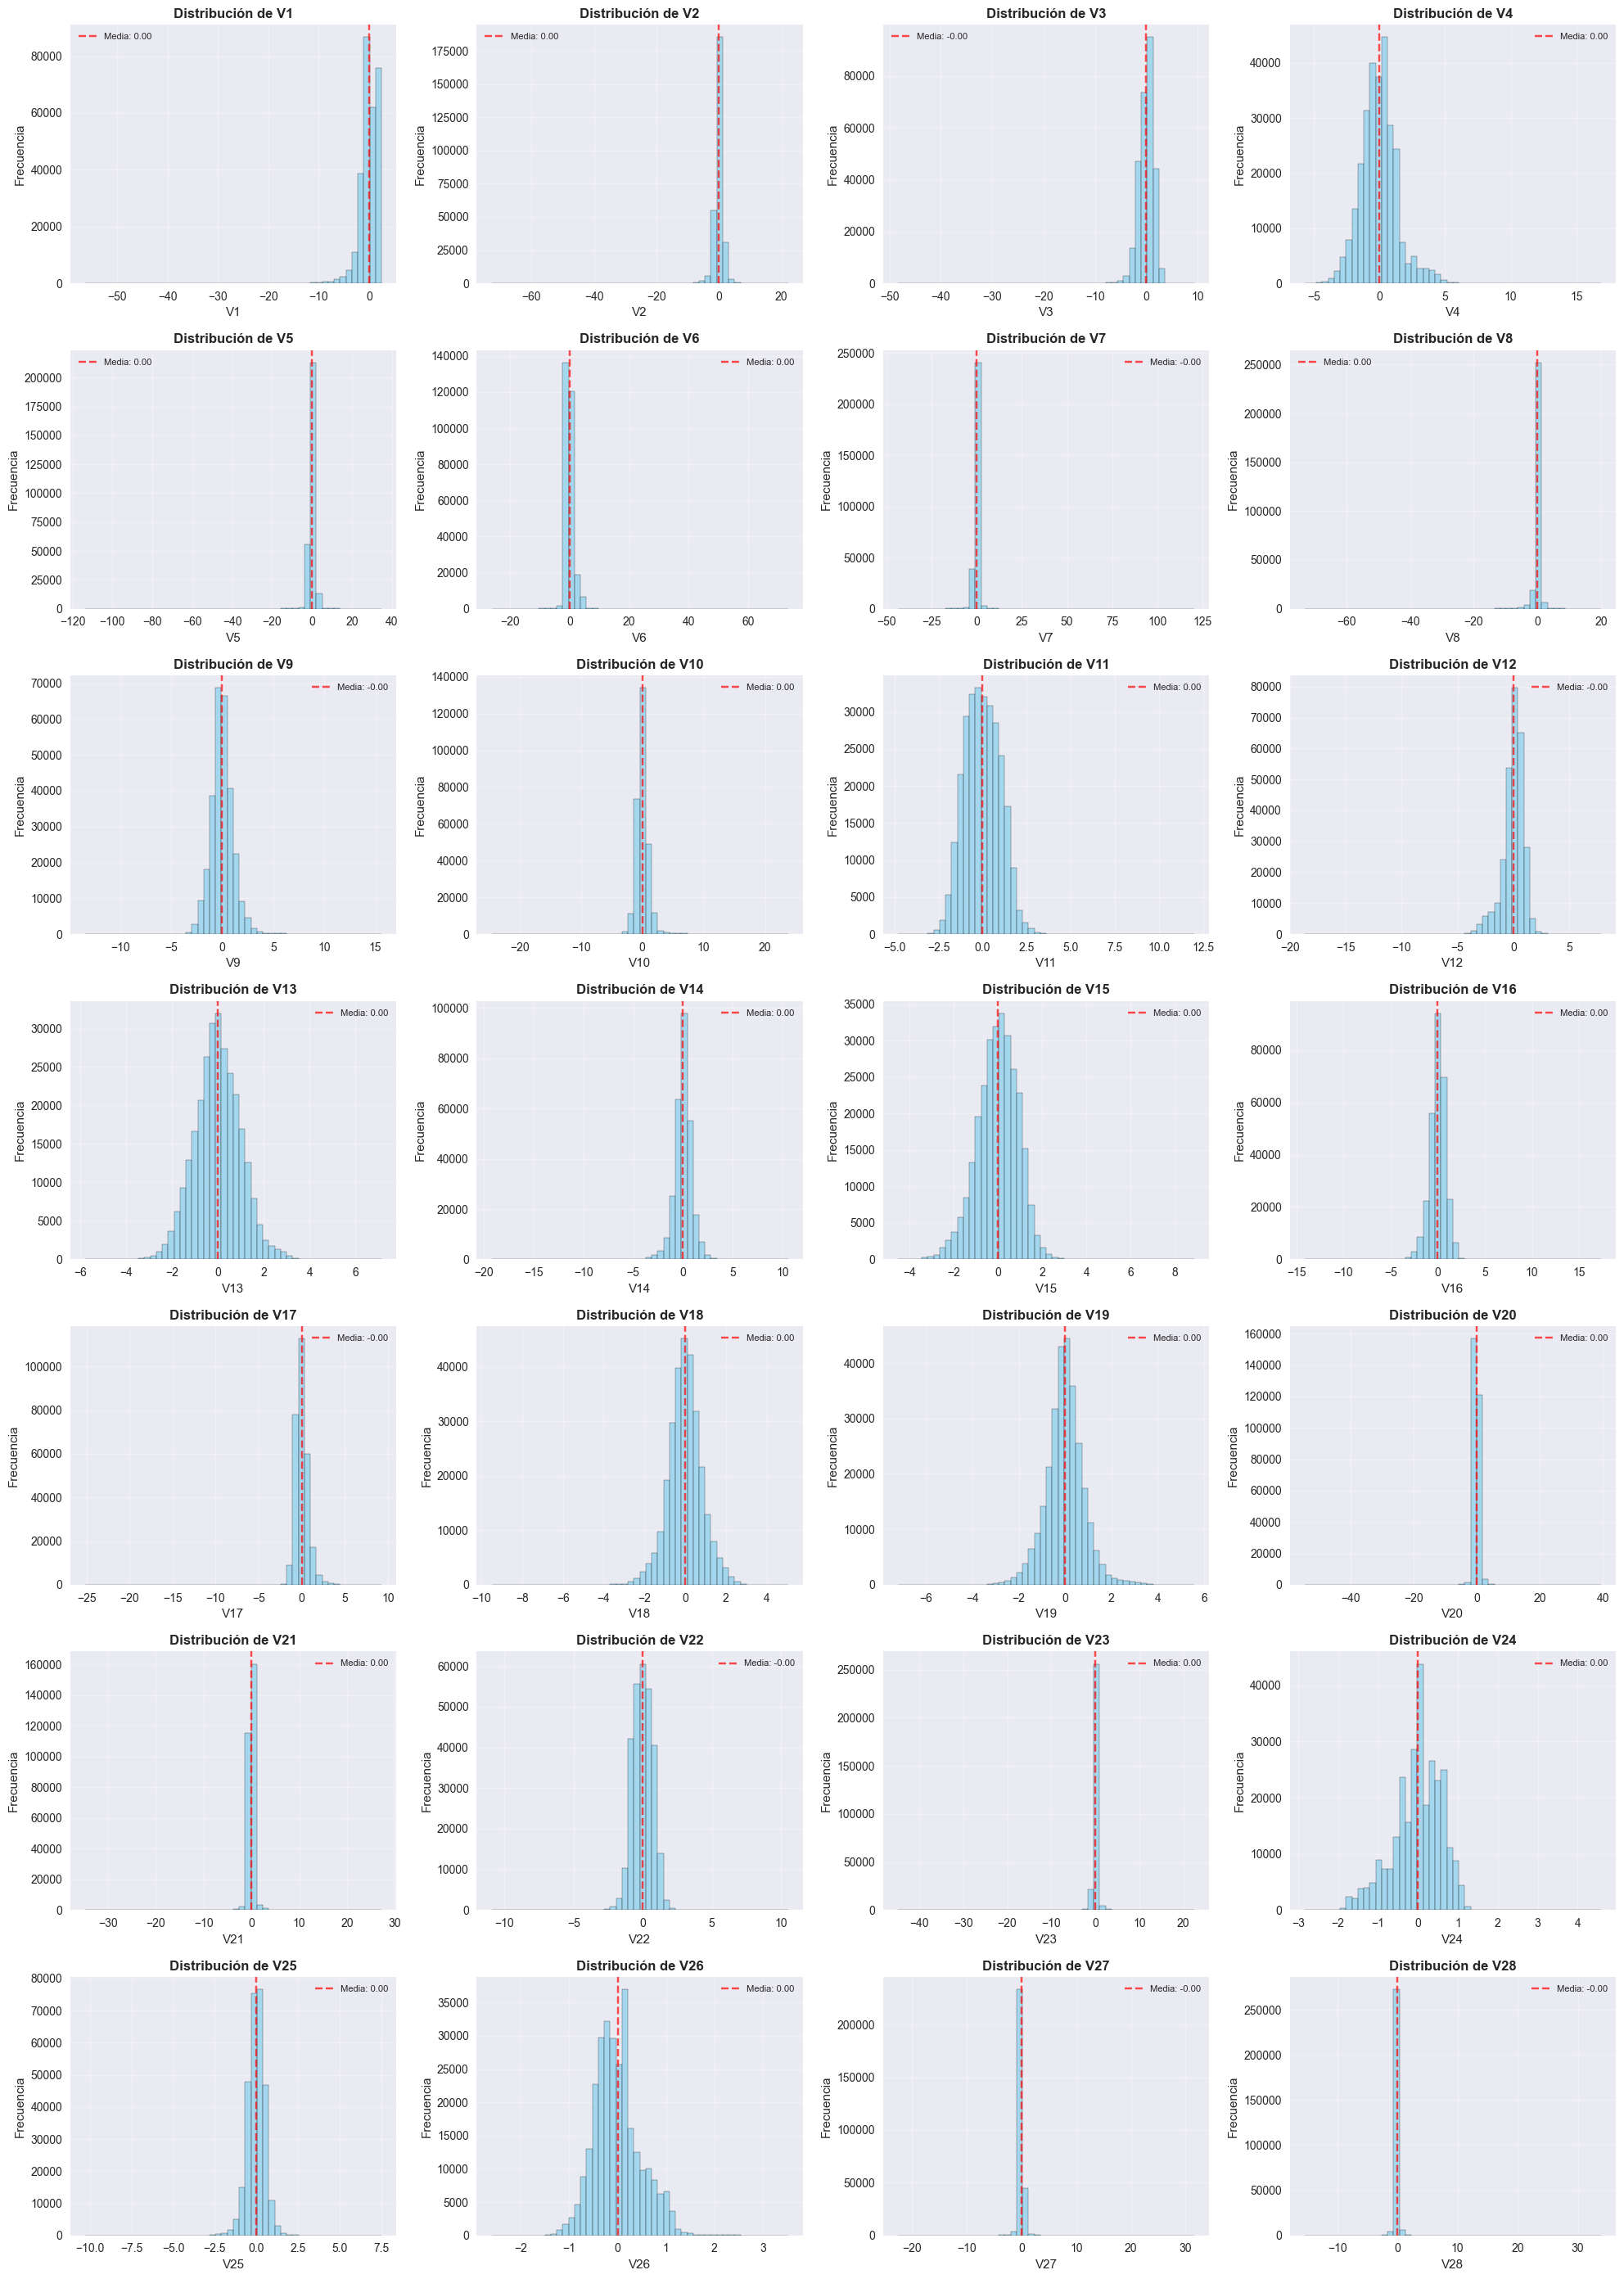

In [21]:
# Distribución de variables PCA
fig, axes = plt.subplots(7, 4, figsize=(20, 28))
axes = axes.ravel()

for i, col in enumerate(pca_columns):
    # Histograma para cada variable PCA
    axes[i].hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)
    
    # Agregar estadísticas básicas
    mean_val = df[col].mean()
    std_val = df[col].std()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

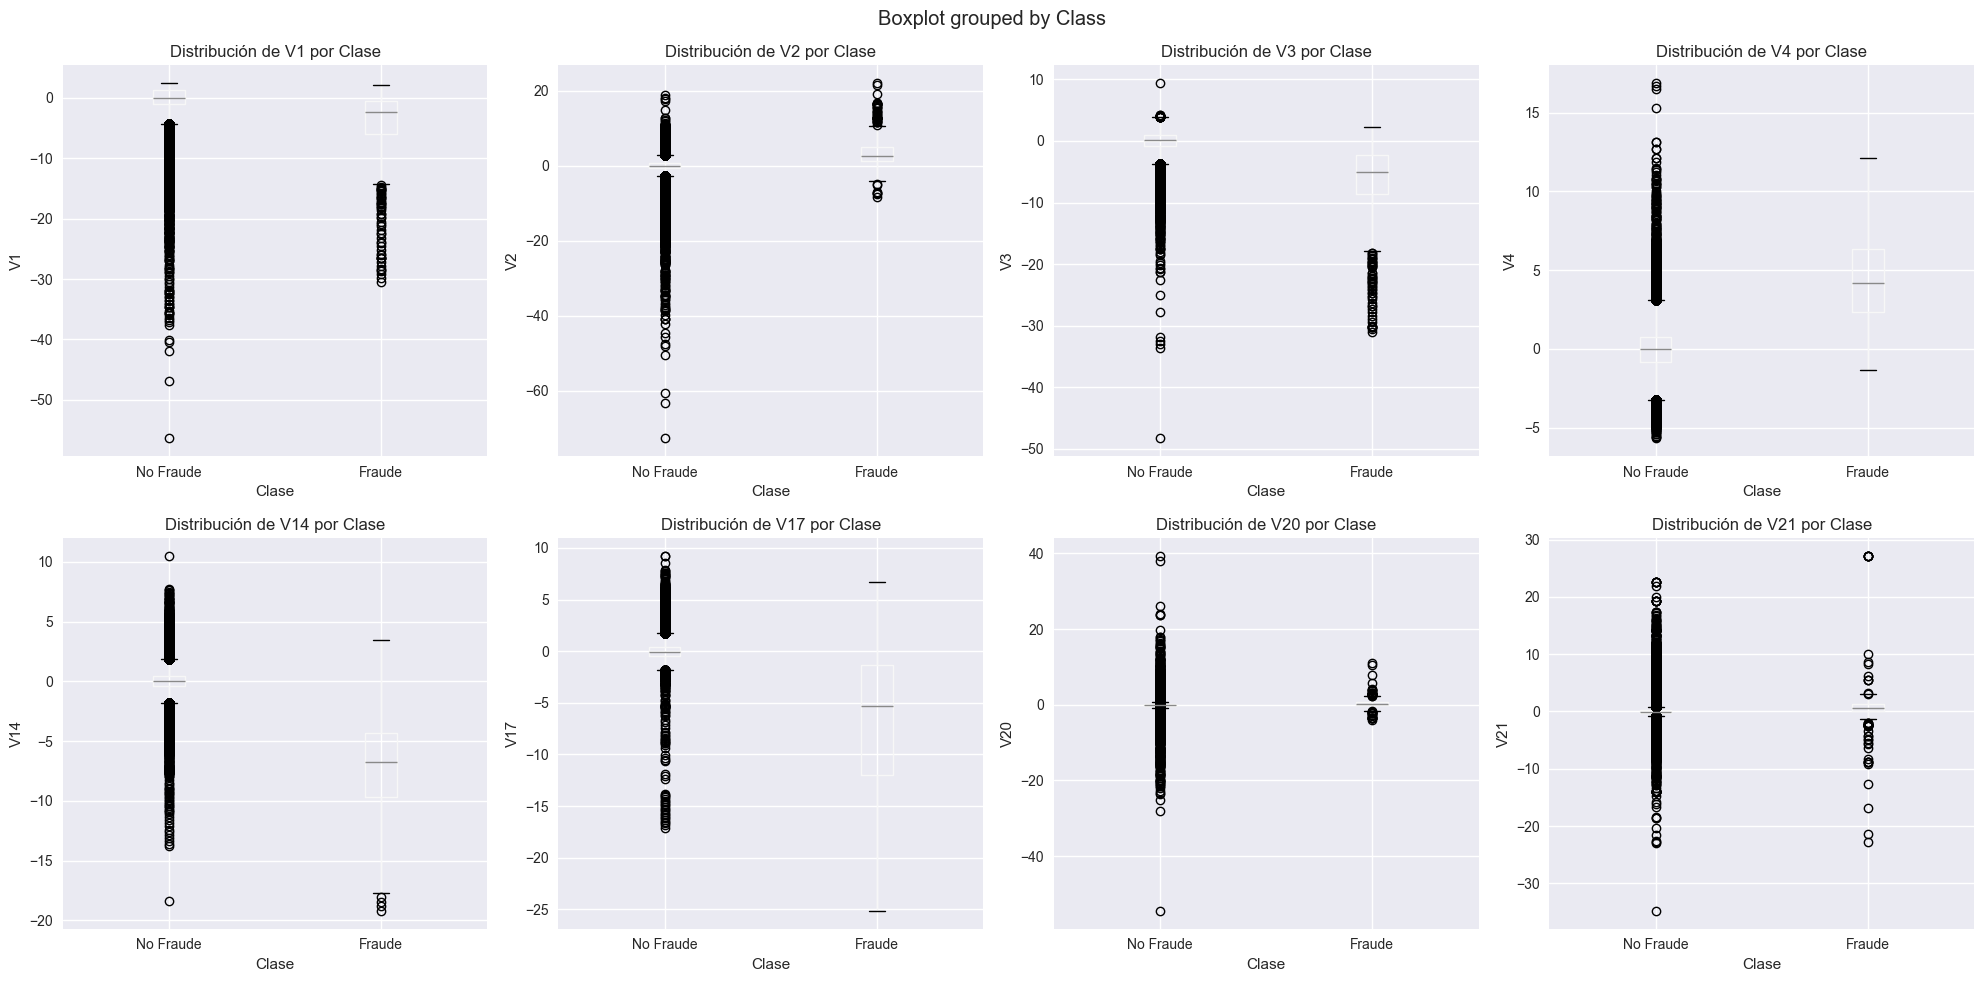

In [22]:
# Comparación de variables PCA por clase
# Seleccionar algunas variables PCA para análisis detallado
selected_pca = ['V1', 'V2', 'V3', 'V4', 'V14', 'V17', 'V20', 'V21']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(selected_pca):
    # Box plot por clase para variables PCA seleccionadas
    df.boxplot(column=col, by='Class', ax=axes[i])
    axes[i].set_title(f'Distribución de {col} por Clase')
    axes[i].set_xlabel('Clase')
    axes[i].set_ylabel(col)
    axes[i].set_xticklabels(['No Fraude', 'Fraude'])

plt.tight_layout()
plt.show()

## 7. Análisis de Correlaciones

In [23]:
# Matriz de correlación
print("🔗 ANÁLISIS DE CORRELACIONES")
print("=" * 30)

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Correlaciones con la variable objetivo
target_correlations = correlation_matrix['Class'].abs().sort_values(ascending=False)
print("📊 Variables más correlacionadas con la variable objetivo (Class):")
print(target_correlations.head(10))

print("\n🔍 Top 5 variables positivamente correlacionadas con fraude:")
positive_corr = correlation_matrix['Class'][correlation_matrix['Class'] > 0].sort_values(ascending=False)
print(positive_corr.head())

print("\n🔍 Top 5 variables negativamente correlacionadas con fraude:")
negative_corr = correlation_matrix['Class'][correlation_matrix['Class'] < 0].sort_values()
print(negative_corr.head())

🔗 ANÁLISIS DE CORRELACIONES
📊 Variables más correlacionadas con la variable objetivo (Class):
Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64

🔍 Top 5 variables positivamente correlacionadas con fraude:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
Name: Class, dtype: float64

🔍 Top 5 variables negativamente correlacionadas con fraude:
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64


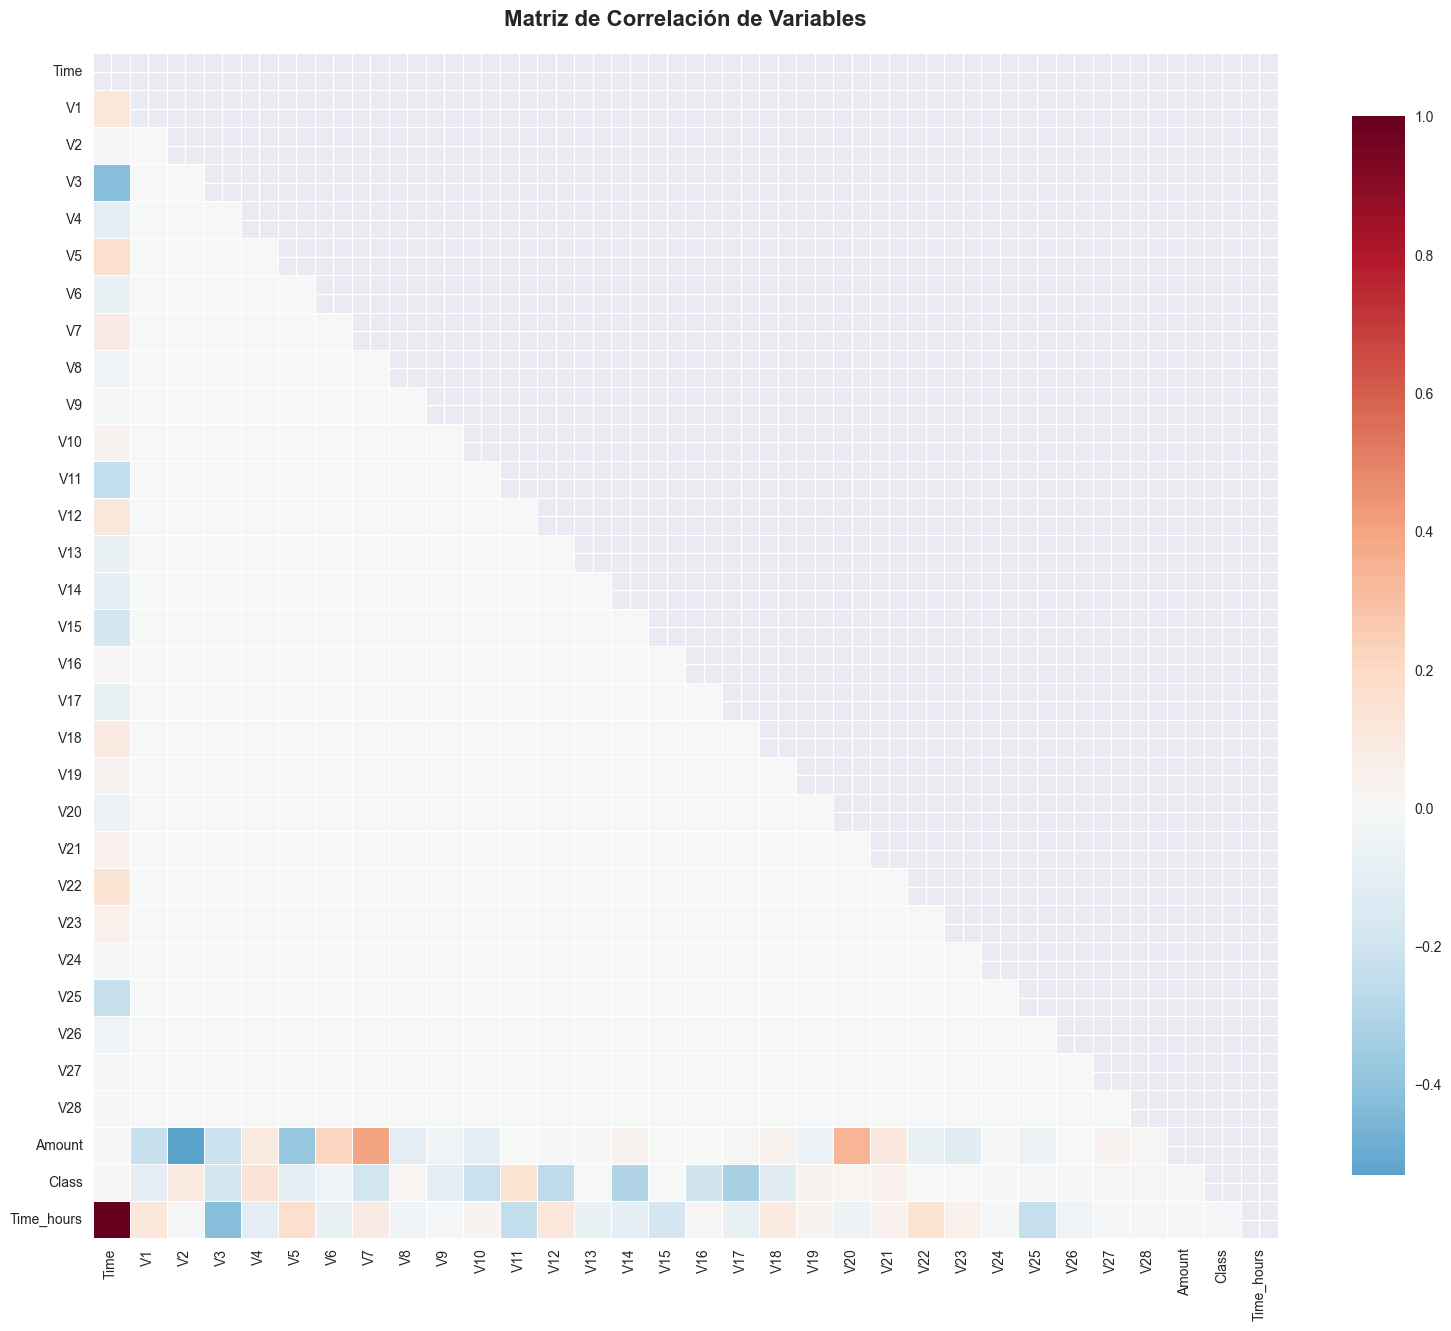

In [24]:
# Visualización de la matriz de correlación
plt.figure(figsize=(16, 14))

# Crear máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear mapa de calor
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=False, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación de Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

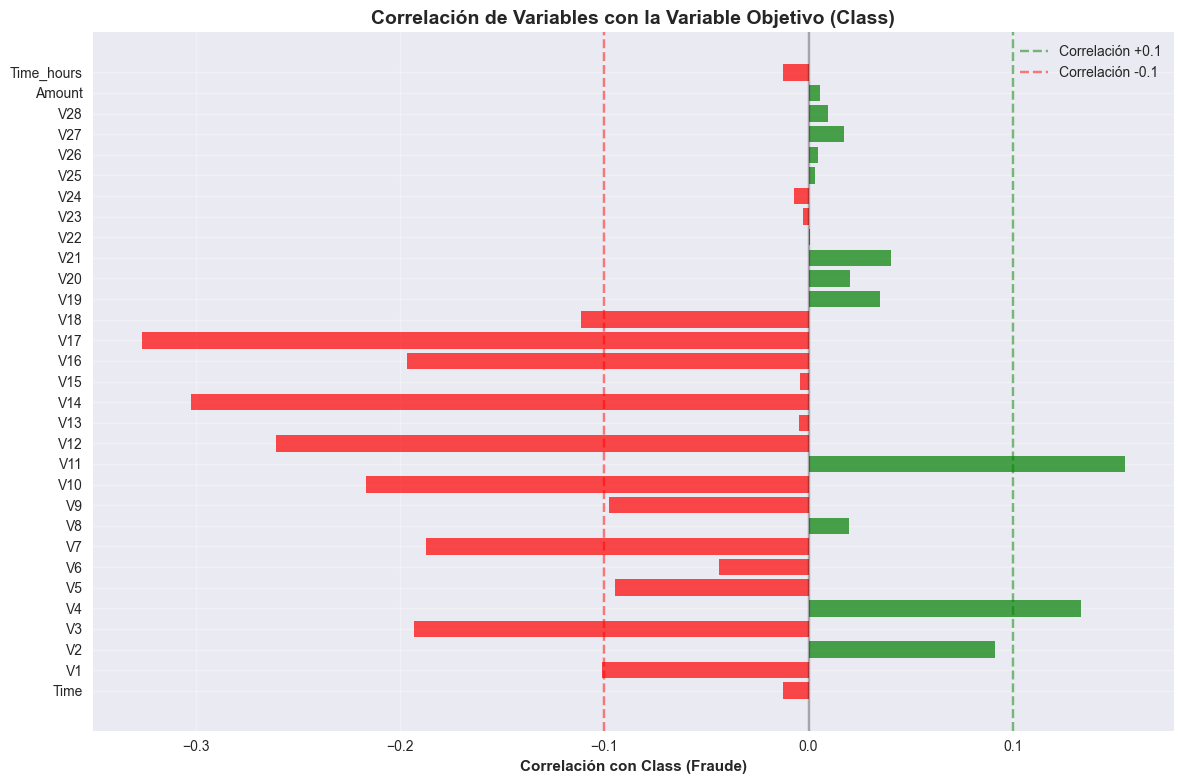

In [25]:
# Correlaciones específicas con la variable objetivo
plt.figure(figsize=(12, 8))

# Obtener correlaciones con Class (excluyendo Class misma)
class_correlations = correlation_matrix['Class'].drop('Class')

# Crear gráfico de barras horizontal
colors = ['red' if x < 0 else 'green' for x in class_correlations.values]
bars = plt.barh(range(len(class_correlations)), class_correlations.values, color=colors, alpha=0.7)

plt.yticks(range(len(class_correlations)), class_correlations.index)
plt.xlabel('Correlación con Class (Fraude)', fontweight='bold')
plt.title('Correlación de Variables con la Variable Objetivo (Class)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Agregar líneas de referencia
plt.axvline(x=0.1, color='green', linestyle='--', alpha=0.5, label='Correlación +0.1')
plt.axvline(x=-0.1, color='red', linestyle='--', alpha=0.5, label='Correlación -0.1')
plt.legend()

plt.tight_layout()
plt.show()

## 8. Análisis de Valores Atípicos

In [26]:
# Análisis de valores atípicos
print("🚨 ANÁLISIS DE VALORES ATÍPICOS")
print("=" * 35)

def detect_outliers_iqr(data, factor=1.5):
    """
    Detecta valores atípicos usando el método IQR
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analizar valores atípicos en variables principales
variables_to_analyze = ['Time', 'Amount'] + selected_pca

outlier_summary = []

for var in variables_to_analyze:
    outliers, lower, upper = detect_outliers_iqr(df[var])
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': var,
        'Outliers': outlier_count,
        'Percentage': outlier_percentage,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print("📊 Resumen de valores atípicos por variable:")
display(outlier_df)

🚨 ANÁLISIS DE VALORES ATÍPICOS
📊 Resumen de valores atípicos por variable:


,Variable,Outliers,Percentage,Lower_Bound,Upper_Bound
0,Time,0,0.000000,-73477.000000,266999.000000
1,Amount,31904,11.201972,-101.747500,184.512500
2,V1,7062,2.479574,-4.274396,4.669664
3,V2,13526,4.749181,-2.701961,2.907135
4,V3,3363,1.180800,-3.766705,3.903536
5,V4,11148,3.914230,-3.236612,3.131313
6,V14,14149,4.967926,-1.803660,1.871236
7,V17,7420,2.605273,-1.808883,1.724810
8,V20,27770,9.750463,-0.728865,0.650184
9,V21,14497,5.090114,-0.850553,0.808535


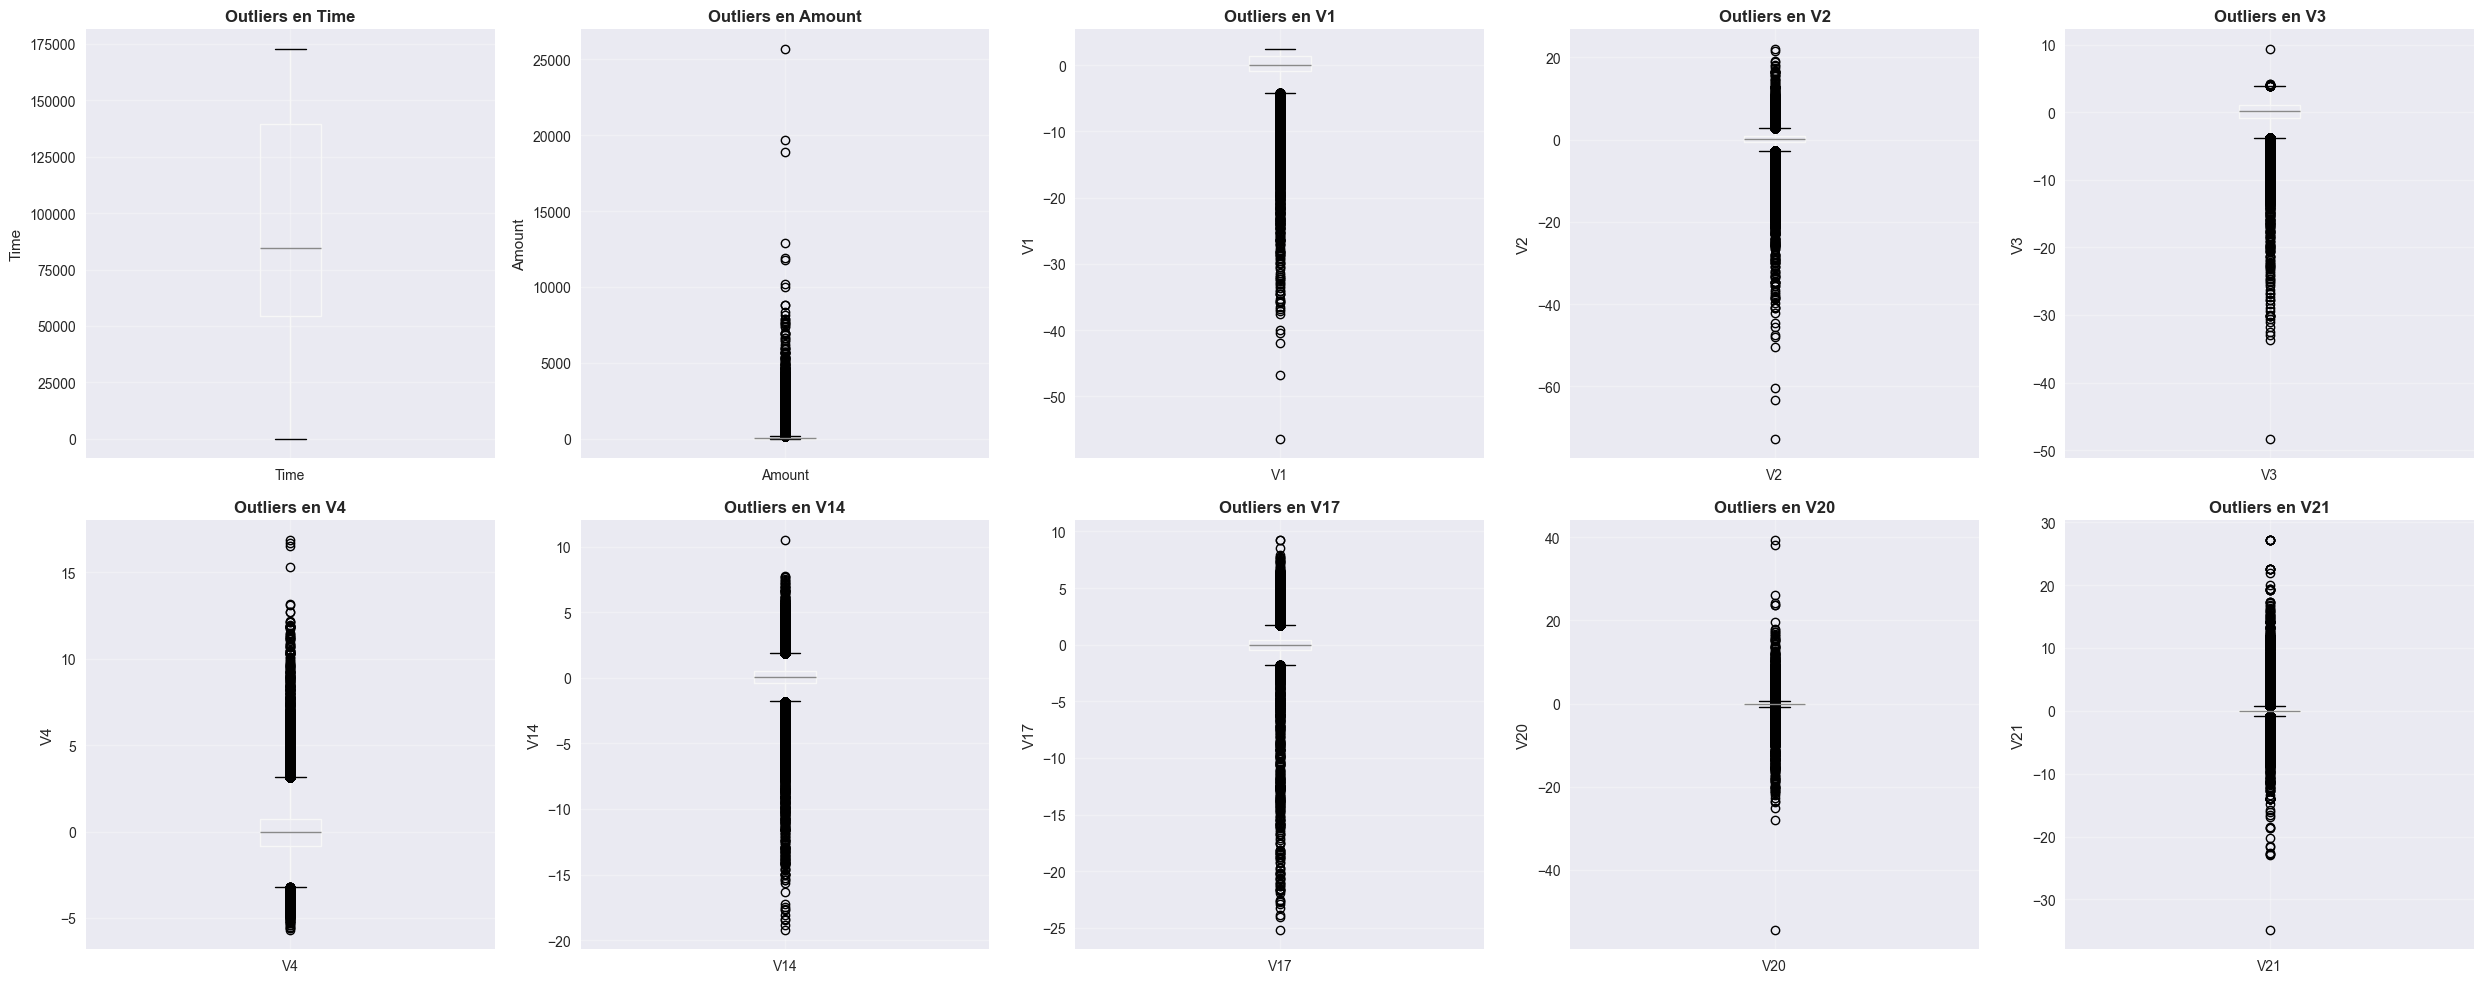

In [27]:
# Visualización de valores atípicos
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.ravel()

for i, var in enumerate(variables_to_analyze):
    # Box plot para identificar outliers
    df.boxplot(column=var, ax=axes[i])
    axes[i].set_title(f'Outliers en {var}', fontweight='bold')
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Análisis Bivariado Avanzado

📈 ANÁLISIS BIVARIADO AVANZADO
📊 Variables seleccionadas para análisis bivariado: ['V17', 'V14', 'V12', 'V10', 'V16']


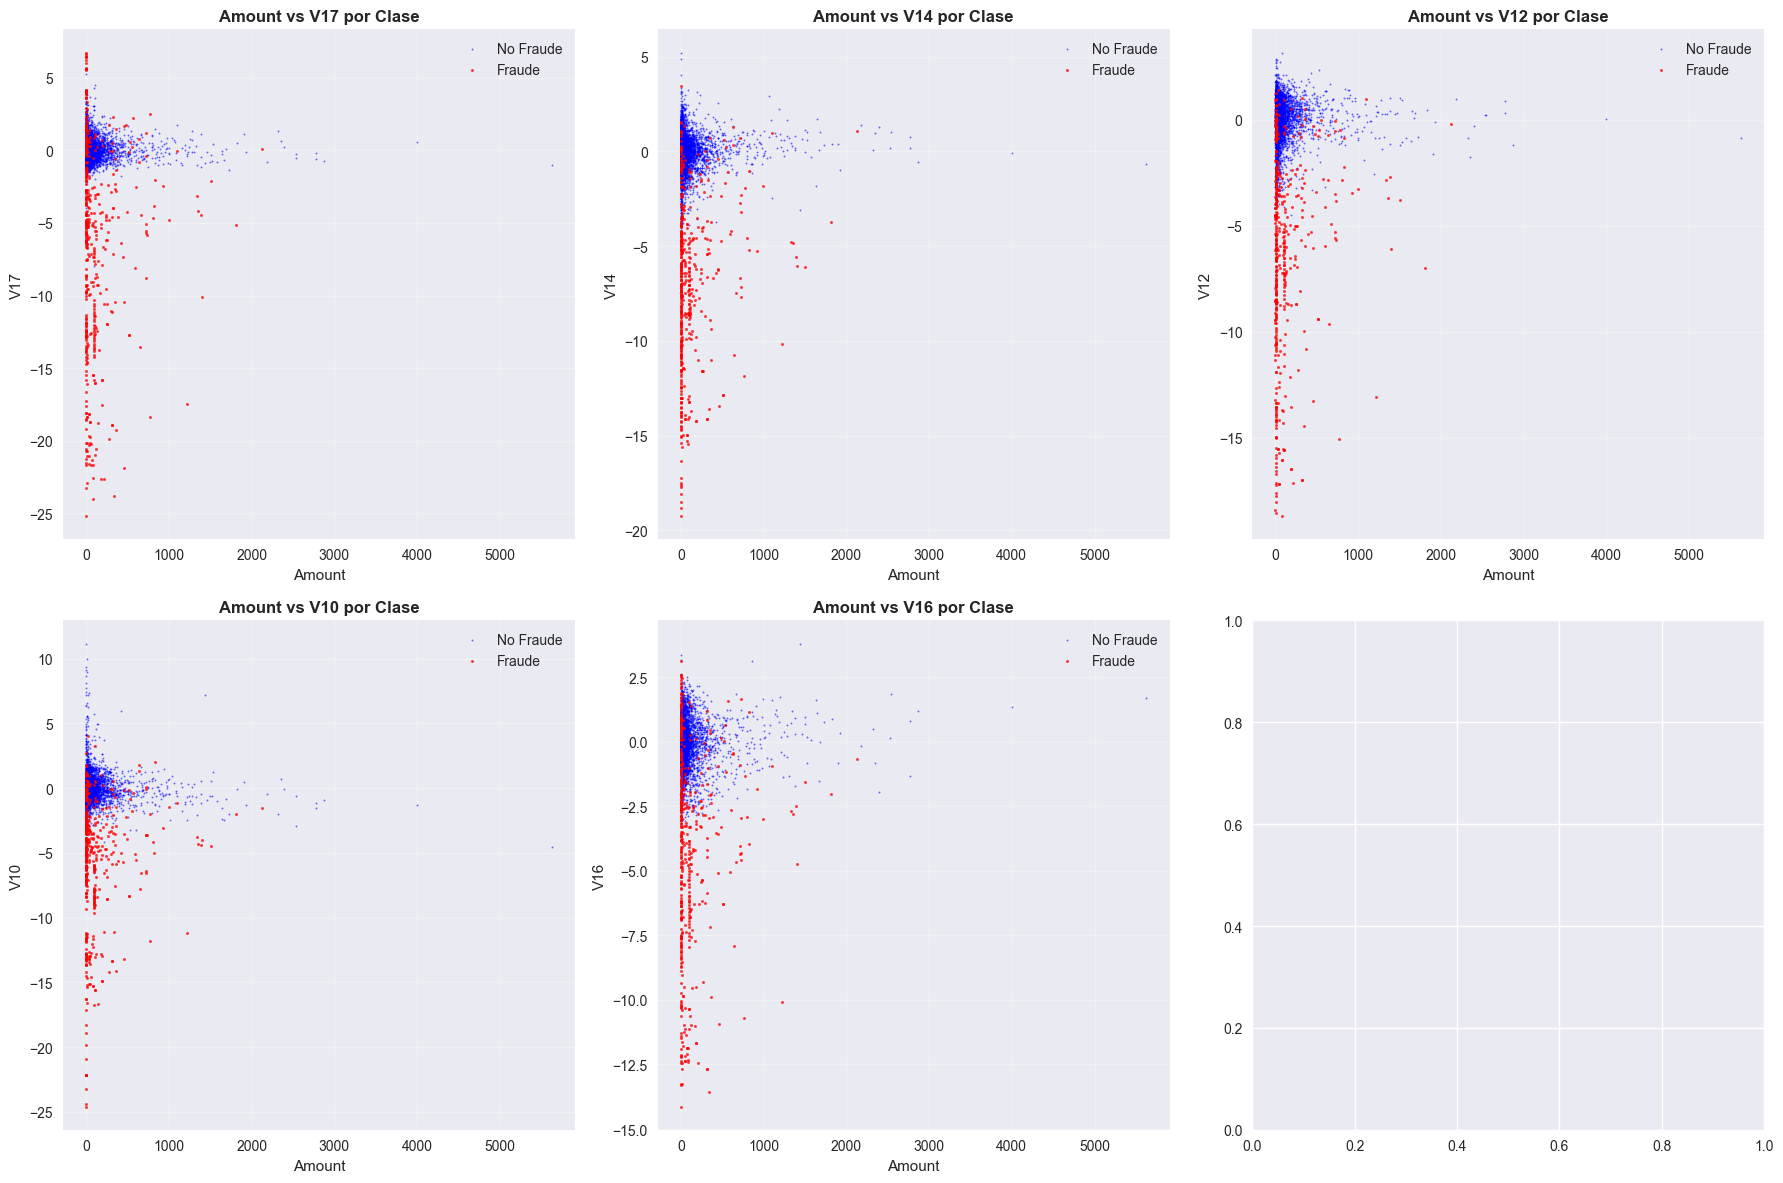

In [28]:
# Análisis bivariado entre variables importantes y la clase
print("📈 ANÁLISIS BIVARIADO AVANZADO")
print("=" * 35)

# Seleccionar variables más correlacionadas con Class
top_corr_vars = target_correlations.head(6).index.tolist()
top_corr_vars.remove('Class')  # Remover Class de la lista

print(f"📊 Variables seleccionadas para análisis bivariado: {top_corr_vars}")

# Crear scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(top_corr_vars[:6]):
    # Scatter plot con colores por clase
    fraud_data = df[df['Class'] == 1]
    normal_data = df[df['Class'] == 0]
    
    # Sampling para mejorar visualización
    normal_sample = normal_data.sample(n=min(5000, len(normal_data)), random_state=42)
    
    axes[i].scatter(normal_sample['Amount'], normal_sample[var], 
                   alpha=0.5, s=1, color='blue', label='No Fraude')
    axes[i].scatter(fraud_data['Amount'], fraud_data[var], 
                   alpha=0.8, s=3, color='red', label='Fraude')
    
    axes[i].set_xlabel('Amount')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Amount vs {var} por Clase', fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Resumen Ejecutivo del EDA

In [29]:
# Resumen ejecutivo
print("📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO")
print("=" * 55)

print("🎯 CARACTERÍSTICAS DEL DATASET:")
print(f"   • Total de transacciones: {len(df):,}")
print(f"   • Variables: {df.shape[1]} (28 PCA + Time + Amount + Class)")
print(f"   • Período: {df['Time_hours'].max()/24:.1f} días")
print(f"   • Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print("\n⚖️ DESBALANCE DE CLASES:")
fraud_count = df['Class'].sum()
normal_count = len(df) - fraud_count
fraud_percentage = (fraud_count / len(df)) * 100
print(f"   • Transacciones normales: {normal_count:,} ({100-fraud_percentage:.3f}%)")
print(f"   • Transacciones fraudulentas: {fraud_count:,} ({fraud_percentage:.3f}%)")
print(f"   • Ratio de desbalance: {normal_count/fraud_count:.0f}:1")

print("\n💰 ANÁLISIS DE MONTOS:")
print(f"   • Monto promedio (todas): ${df['Amount'].mean():.2f}")
print(f"   • Monto promedio (fraude): ${df[df['Class']==1]['Amount'].mean():.2f}")
print(f"   • Monto promedio (no fraude): ${df[df['Class']==0]['Amount'].mean():.2f}")
print(f"   • Monto máximo: ${df['Amount'].max():,.2f}")

print("\n🔗 CORRELACIONES CLAVE:")
top_positive = correlation_matrix['Class'][correlation_matrix['Class'] > 0].sort_values(ascending=False)
top_negative = correlation_matrix['Class'][correlation_matrix['Class'] < 0].sort_values()
print(f"   • Mayor correlación positiva: {top_positive.index[1]} ({top_positive.iloc[1]:.3f})")
print(f"   • Mayor correlación negativa: {top_negative.index[0]} ({top_negative.iloc[0]:.3f})")

print("\n🚨 VALORES ATÍPICOS:")
amount_outliers, _, _ = detect_outliers_iqr(df['Amount'])
print(f"   • Outliers en Amount: {len(amount_outliers):,} ({len(amount_outliers)/len(df)*100:.2f}%)")

print("\n✅ CALIDAD DE DATOS:")
print(f"   • Valores faltantes: {df.isnull().sum().sum()}")
print(f"   • Filas duplicadas: {df.duplicated().sum()}")
print(f"   • Tipos de datos consistentes: ✓")

print("\n🔍 INSIGHTS PRINCIPALES:")
print("   • Dataset altamente desbalanceado - requerirá técnicas de balanceo")
print("   • Variables PCA preservan privacidad pero dificultan interpretación")
print("   • Patrones temporales pueden ser relevantes para detección")
print("   • Montos de transacciones fraudulentas tienden a ser menores")
print("   • Algunas variables PCA muestran diferencias claras entre clases")

print("\n📝 RECOMENDACIONES PARA MODELADO:")
print("   • Aplicar técnicas de balanceo (SMOTE, undersampling)")
print("   • Considerar normalización de variables Time y Amount")
print("   • Usar métricas apropiadas para datos desbalanceados (F1, ROC-AUC)")
print("   • Implementar validación cruzada estratificada")
print("   • Considerar ensemble methods para mejor performance")

print("\n" + "=" * 55)
print("🎯 EDA COMPLETADO - LISTO PARA PREPROCESAMIENTO")
print("=" * 55)

📋 RESUMEN EJECUTIVO DEL ANÁLISIS EXPLORATORIO
🎯 CARACTERÍSTICAS DEL DATASET:
   • Total de transacciones: 284,807
   • Variables: 32 (28 PCA + Time + Amount + Class)
   • Período: 2.0 días
   • Tamaño en memoria: 69.5 MB

⚖️ DESBALANCE DE CLASES:
   • Transacciones normales: 284,315 (99.827%)
   • Transacciones fraudulentas: 492 (0.173%)
   • Ratio de desbalance: 578:1

💰 ANÁLISIS DE MONTOS:
   • Monto promedio (todas): $88.35
   • Monto promedio (fraude): $122.21
   • Monto promedio (no fraude): $88.29
   • Monto máximo: $25,691.16

🔗 CORRELACIONES CLAVE:
   • Mayor correlación positiva: V11 (0.155)
   • Mayor correlación negativa: V17 (-0.326)

🚨 VALORES ATÍPICOS:
   • Outliers en Amount: 31,904 (11.20%)

✅ CALIDAD DE DATOS:
   • Valores faltantes: 0
   • Filas duplicadas: 1081
   • Tipos de datos consistentes: ✓

🔍 INSIGHTS PRINCIPALES:
   • Dataset altamente desbalanceado - requerirá técnicas de balanceo
   • Variables PCA preservan privacidad pero dificultan interpretación
   • Pa